In [1]:
import numpy as np
import pandas as pd

from plotnine import (
    ggplot,
    aes,
    geom_boxplot,
    geom_jitter,
    scale_x_discrete,
    coord_flip,
)
from plotnine.data import pageviews

### A box and whiskers plot

*The boxplot compactly displays the distribution of a continuous variable.*

Read more:
+ [wikipedia](https://en.wikipedia.org/wiki/Box_plot)
+ [ggplot2 docs](https://ggplot2.tidyverse.org/reference/geom_boxplot.html)


In [2]:
flights = pd.read_csv("data/flights.csv")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Basic boxplot

In [3]:
months = [month[:3] for month in flights.month[:12]]
print(months)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


### A Basic Boxplot

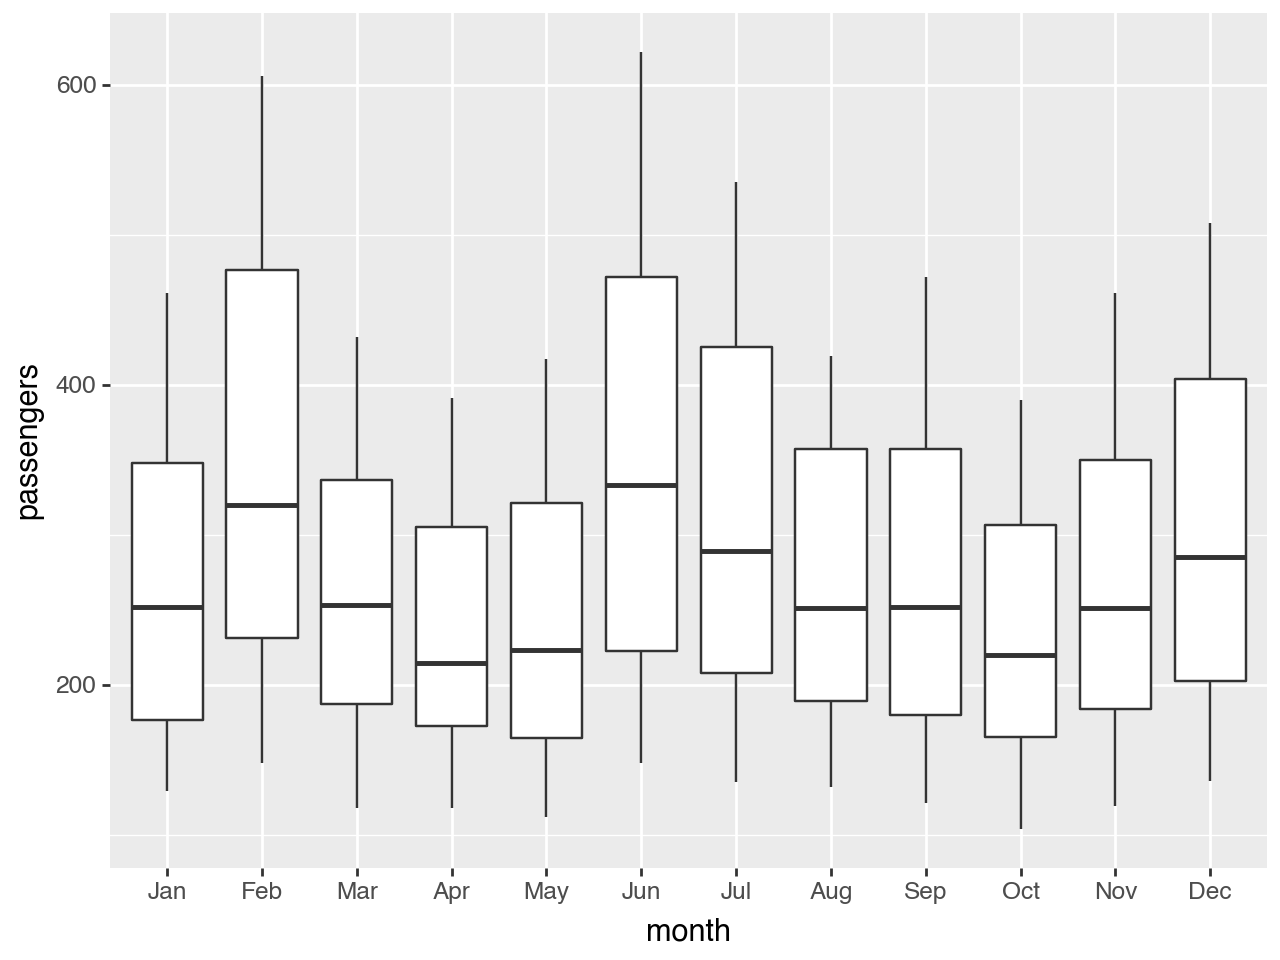

In [4]:
# Gallery, distributions
(
    ggplot(flights)
    + geom_boxplot(aes(x="factor(month)", y="passengers"))
    + scale_x_discrete(labels=months, name="month")  # change ticks labels on OX
)

Horizontal boxplot

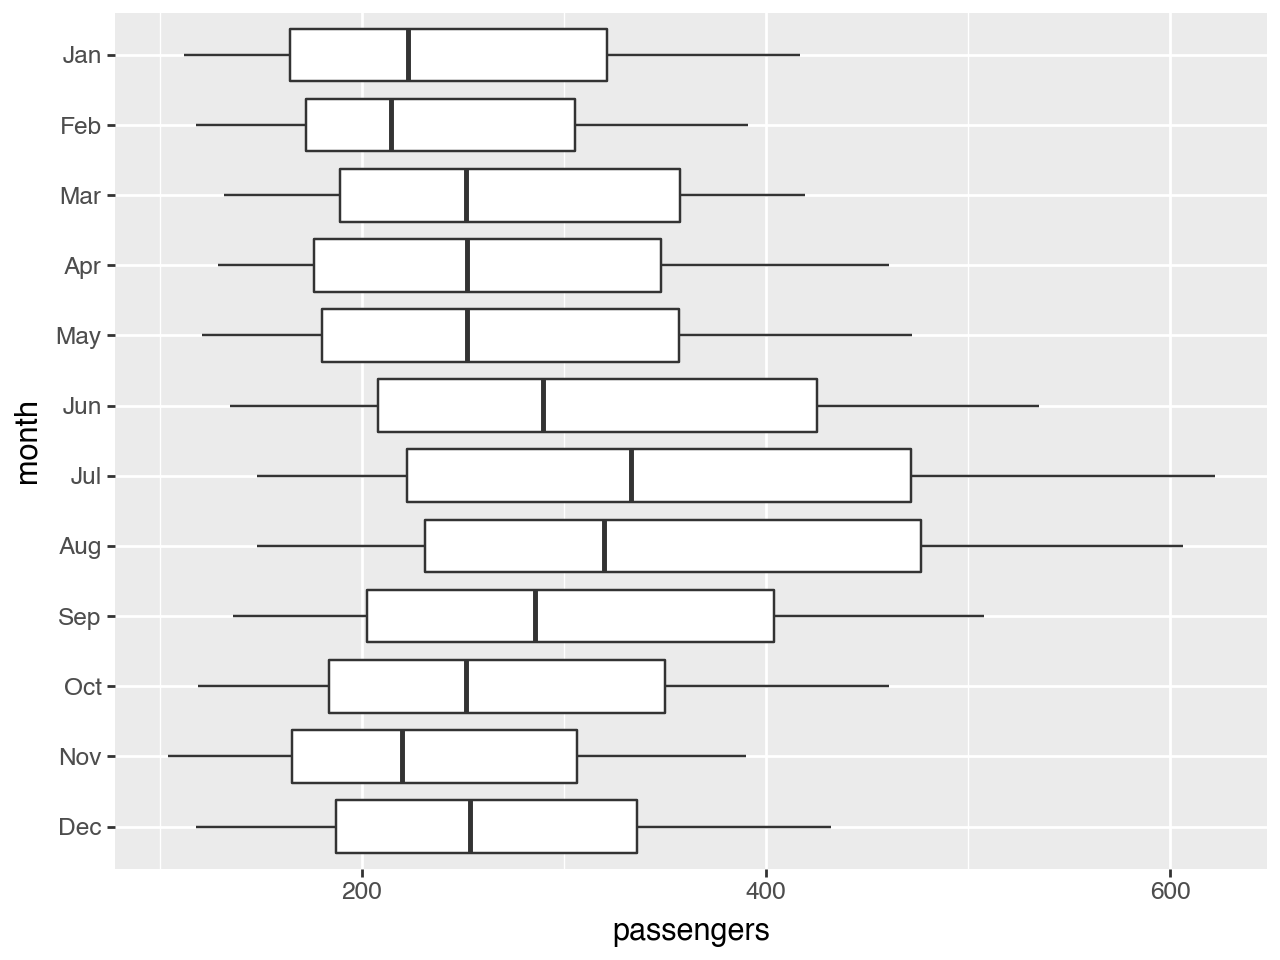

In [5]:
(
    ggplot(flights)
    + geom_boxplot(aes(x="factor(month)", y="passengers"))
    + coord_flip()
    + scale_x_discrete(
        labels=months[::-1],
        limits=flights.month[11::-1],
        name="month",
    )
)

Boxplot with jittered points:

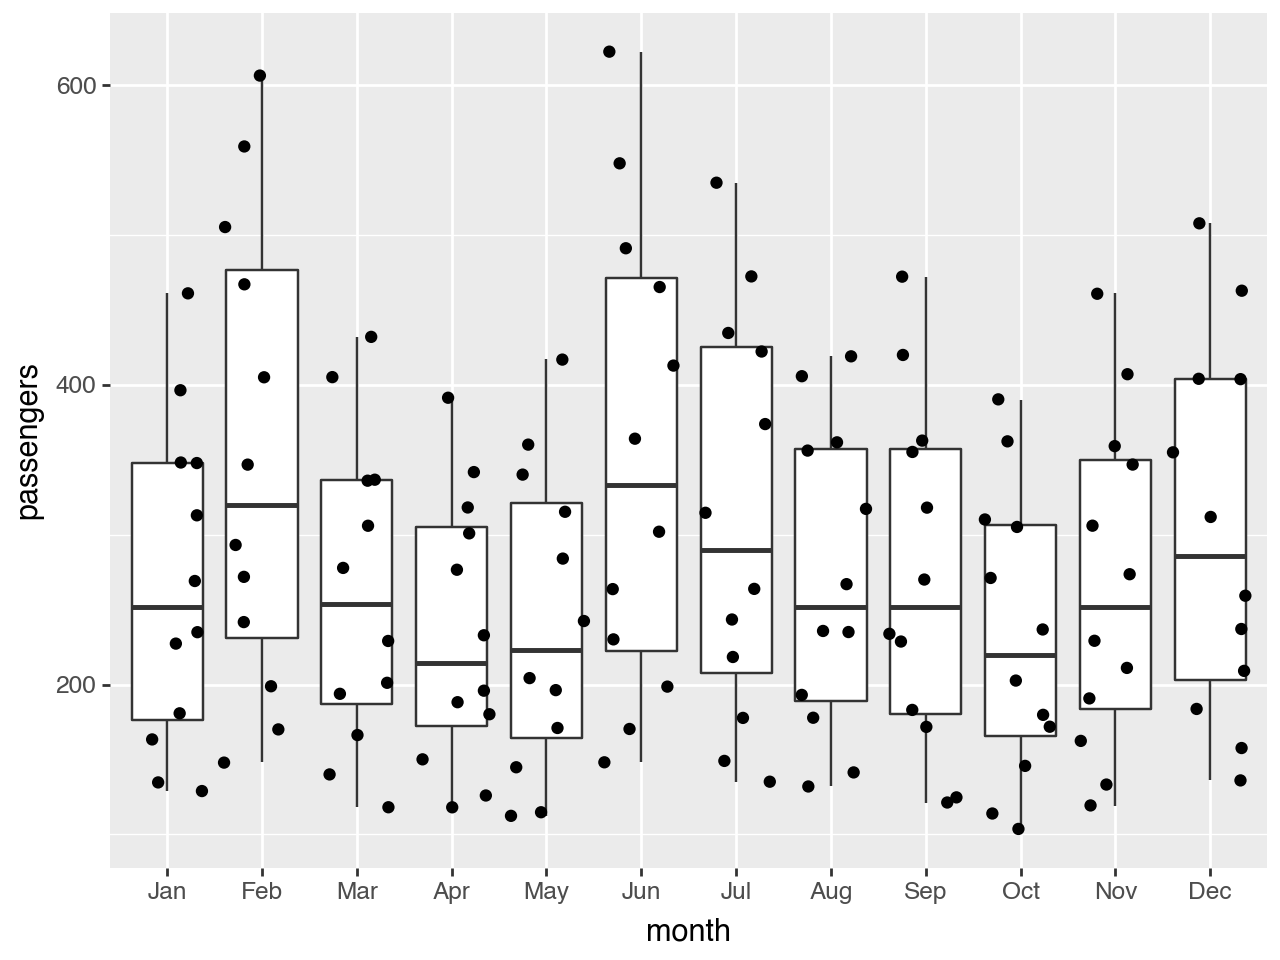

In [6]:
(
    ggplot(flights, aes(x="factor(month)", y="passengers"))
    + geom_boxplot()
    + geom_jitter()
    + scale_x_discrete(labels=months, name="month")  # change ticks labels on OX
)

## Precomputed boxplots

For datasets that do not fit in memory, you can precompute the boxplot metrics (for example by aggregating the statistics using database queries) and then use `geom_boxplot` with `stat="identity"`.

In [7]:
# Precompute the metrics
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)
    
pageviews["hour"] = pageviews.date_hour.dt.hour
precomputed_metrics = pageviews.groupby("hour").agg({'pageviews': ["min", q25, "median", q75, "max"]})
precomputed_metrics.columns = [col_name[1] for col_name in precomputed_metrics.columns]  
precomputed_metrics = precomputed_metrics.reset_index()
precomputed_metrics.head()

,hour,min,q25,median,q75,max
0,0,8437.500380,8842.109077,9297.046035,9600.362430,11762.446233
1,1,8852.123978,9177.938537,9457.821814,10530.072887,11974.437292
2,2,8793.076686,9176.462389,9704.885172,10446.315276,12105.406628
3,3,8683.606449,9574.722286,10615.670464,11290.246605,11651.443193
4,4,8252.974951,9898.998785,10959.909095,11409.657288,11603.711837


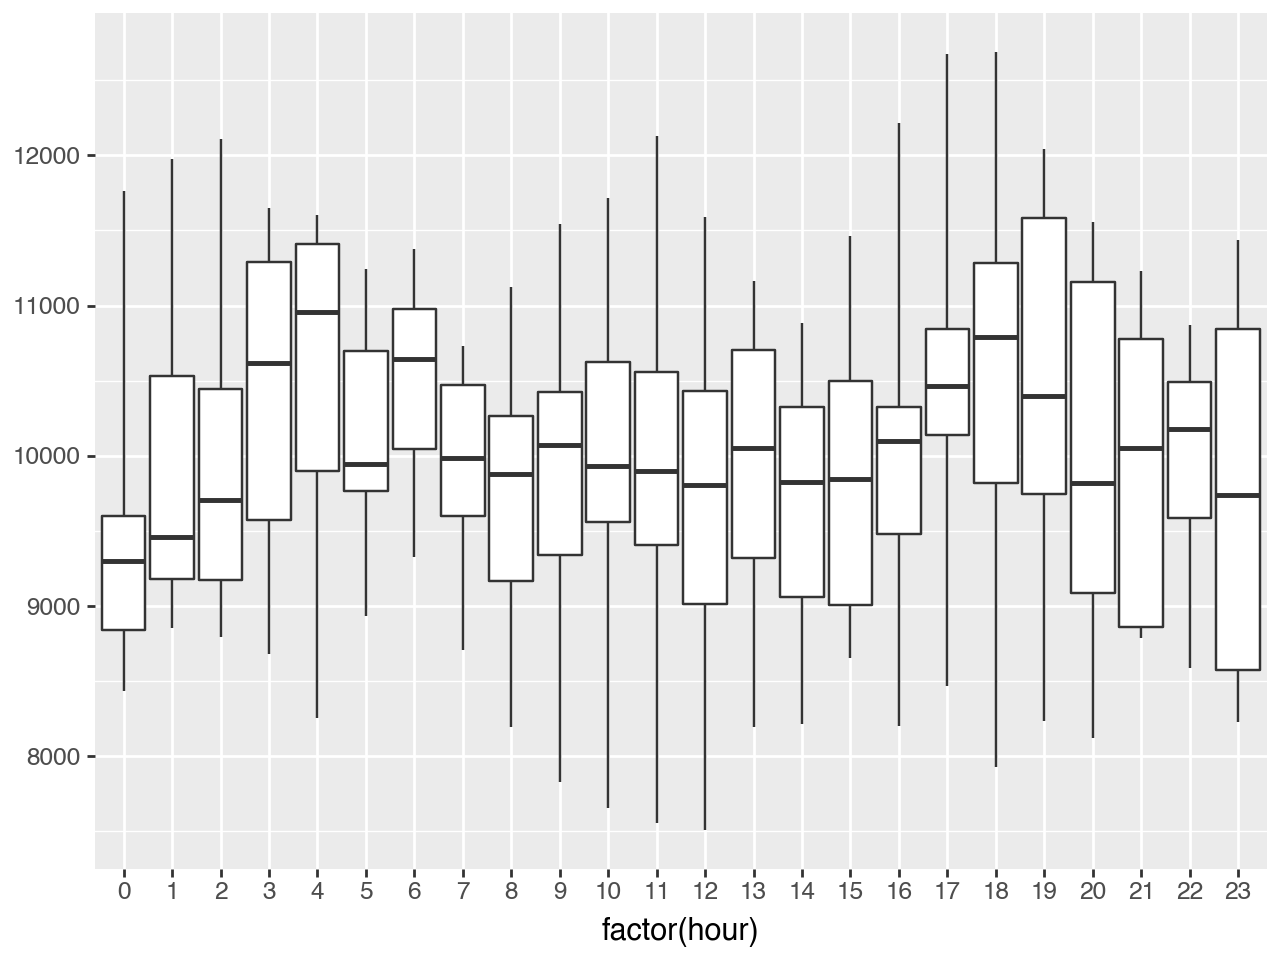

In [8]:
(
    ggplot(precomputed_metrics)
    + geom_boxplot(
        aes(x="factor(hour)", ymin="min", lower="q25", middle="median", upper="q75", ymax="max"),
        stat="identity"
    )
)